In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置图表样式
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
# 加载数据集
df = pd.read_csv('train.csv')

# 显示数据集的前几行
print("数据集前5行：")
print(df.head())

# 显示数据集的基本信息
print("\n数据集基本信息：")
df.info()

# 显示数值型特征的描述性统计
print("\n数值型特征描述性统计：")
print(df.describe())


数据集前5行：
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008     

In [4]:
# 计算每列的缺失值数量
missing_values = df.isnull().sum()

# 筛选出有缺失值的列
missing_values = missing_values[missing_values > 0]

# 按缺失值数量降序排列
missing_values.sort_values(ascending=False, inplace=True)

print("各列缺失值数量：")
print(missing_values)


各列缺失值数量：
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [5]:
# 对于某些分类特征，NaN表示“没有”，用'None'填充
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

# 对于数值型特征，用中位数或0填充
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) # 0表示没有车库
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# 对于数量很少的缺失值，用众数填充
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])


# 再次检查是否还有缺失值
print("处理后剩余的缺失值数量：")
print(df.isnull().sum().sum())


处理后剩余的缺失值数量：
0


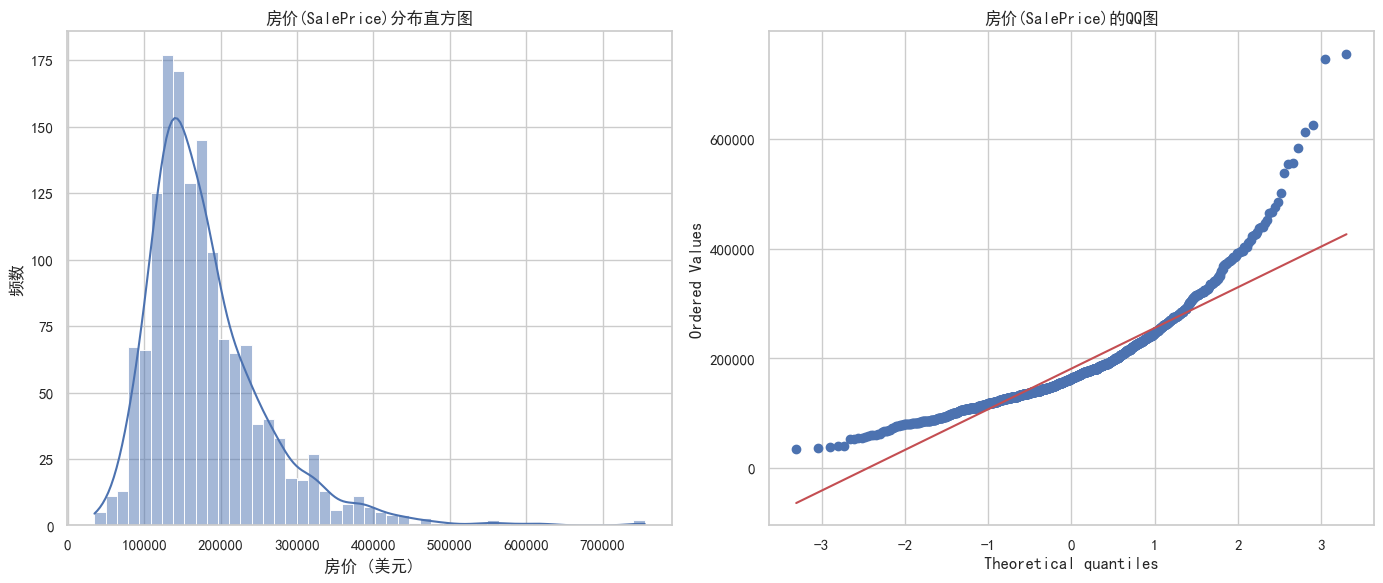

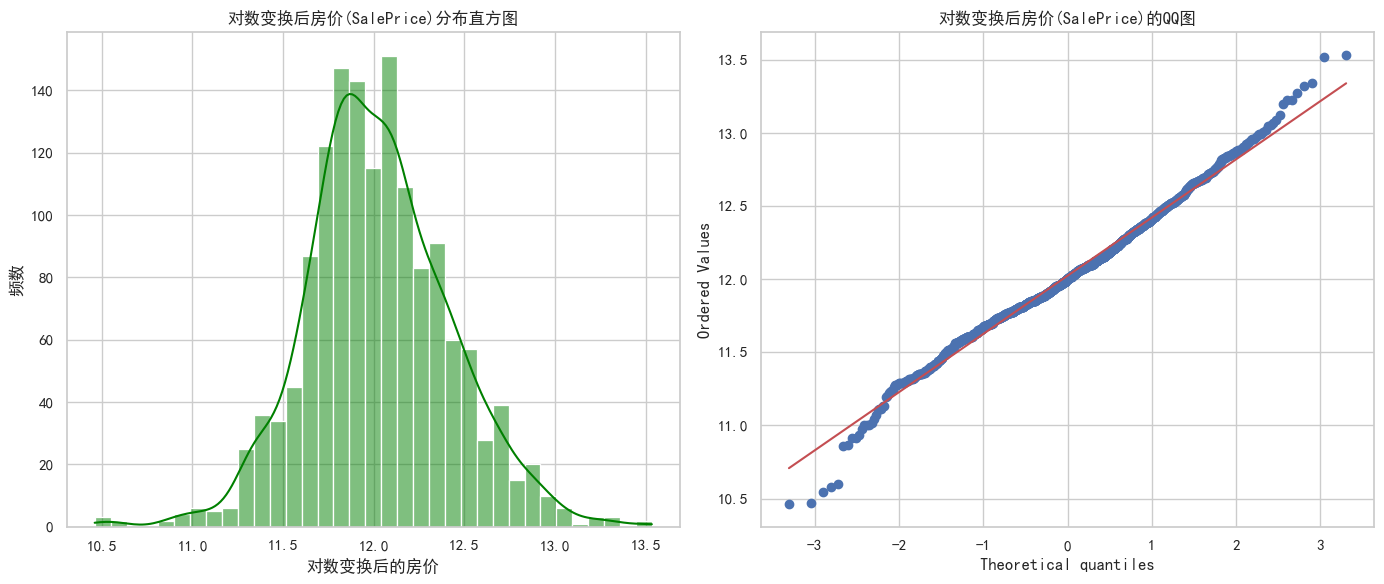

In [6]:
# 绘制SalePrice的分布图
plt.figure(figsize=(14, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('房价(SalePrice)分布直方图')
plt.xlabel('房价 (美元)')
plt.ylabel('频数')

# QQ图 (Quantile-Quantile Plot)
plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice'], plot=plt)
plt.title('房价(SalePrice)的QQ图')

plt.tight_layout()
plt.show()

# 对SalePrice进行对数变换
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# 绘制对数变换后的分布图
plt.figure(figsize=(14, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice_log'], kde=True, color='green')
plt.title('对数变换后房价(SalePrice)分布直方图')
plt.xlabel('对数变换后的房价')
plt.ylabel('频数')

# QQ图
plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice_log'], plot=plt)
plt.title('对数变换后房价(SalePrice)的QQ图')

plt.tight_layout()
plt.show()


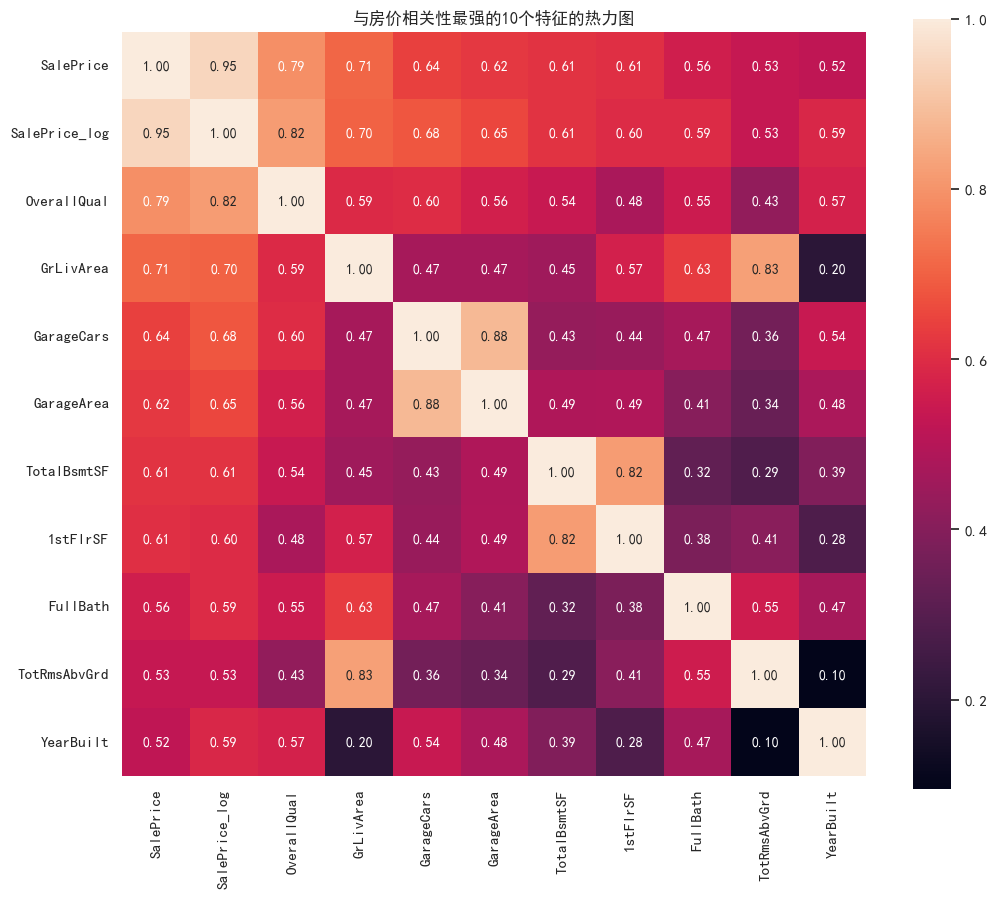

与房价SalePrice最相关的10个特征：
Index(['SalePrice_log', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [8]:
# 计算数值型特征的相关系数矩阵
corrmat = df.select_dtypes(include=[np.number]).corr()

# 筛选出与SalePrice相关性最强的10个特征
k = 11  # 取前11个，因为第一个是SalePrice本身
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values)
plt.title('与房价相关性最强的10个特征的热力图')
plt.show()

print("与房价SalePrice最相关的10个特征：")
print(cols.drop('SalePrice'))


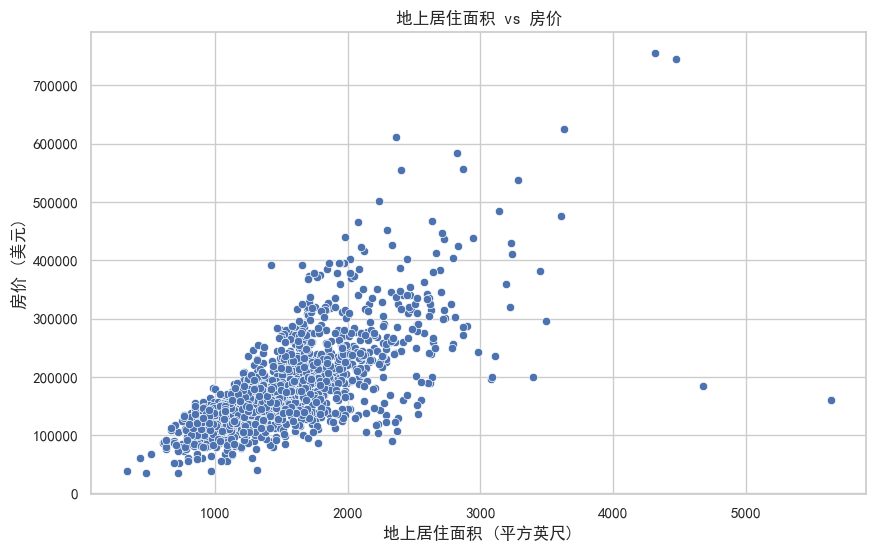

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('地上居住面积 vs 房价')
plt.xlabel('地上居住面积 (平方英尺)')
plt.ylabel('房价 (美元)')
plt.show()


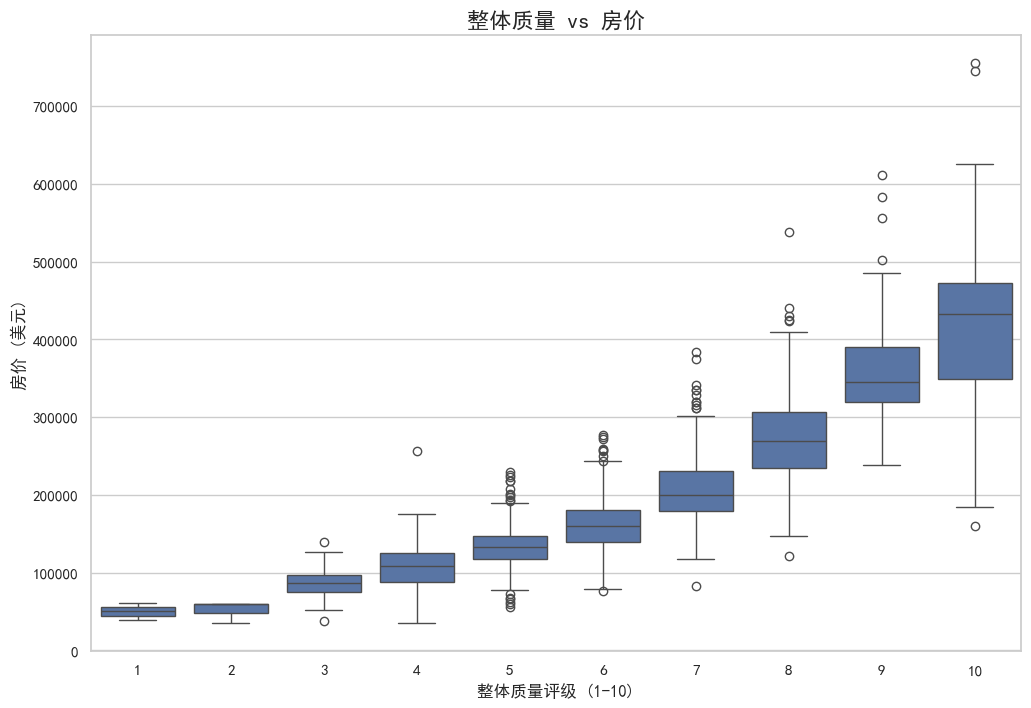

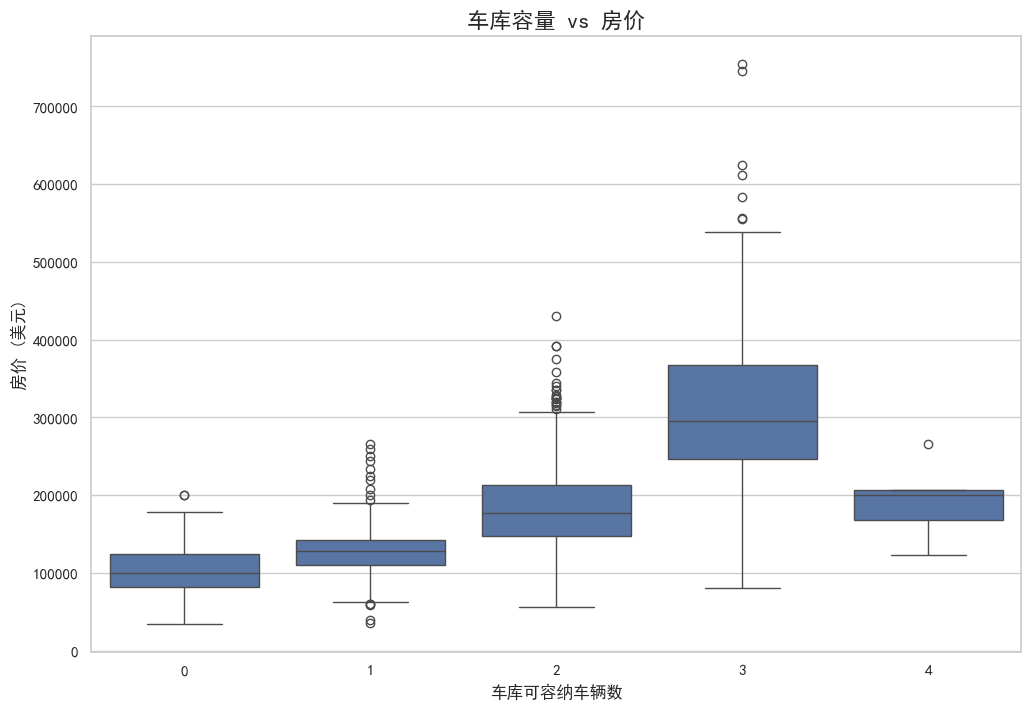

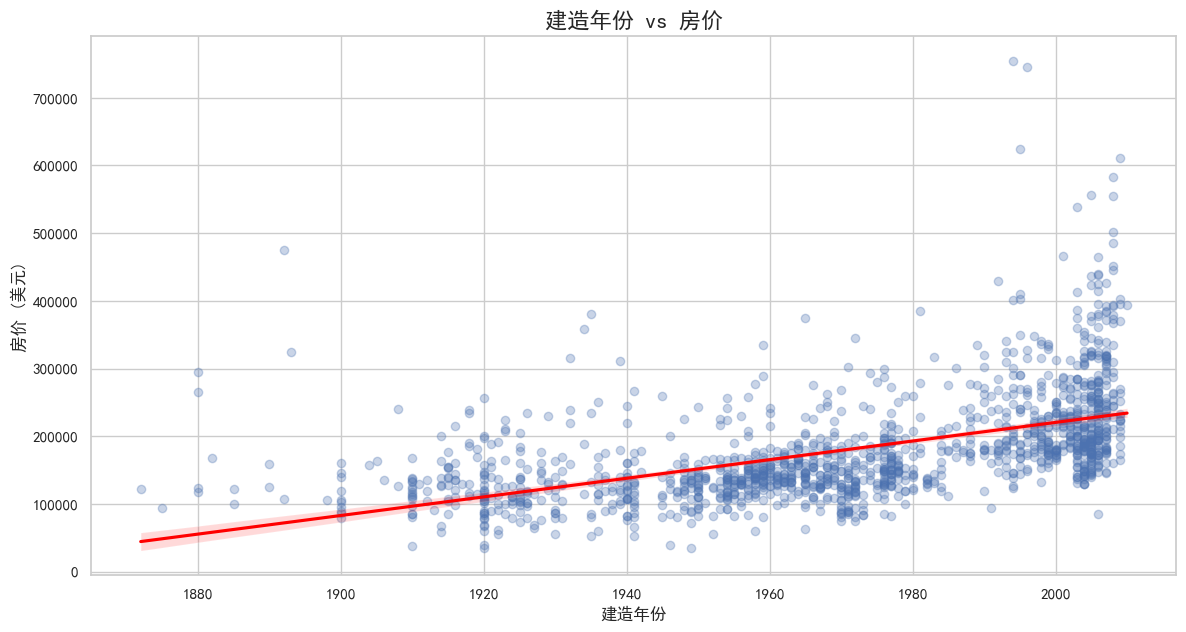

In [11]:
# 可视化：整体质量 vs 房价
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('整体质量 vs 房价', fontsize=16)
plt.xlabel('整体质量评级 (1-10)', fontsize=12)
plt.ylabel('房价 (美元)', fontsize=12)
plt.show()

# 可视化：车库容量 vs 房价
plt.figure(figsize=(12, 8))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('车库容量 vs 房价', fontsize=16)
plt.xlabel('车库可容纳车辆数', fontsize=12)
plt.ylabel('房价 (美元)', fontsize=12)
plt.show()

# 可视化：建造年份 vs 房价
plt.figure(figsize=(14, 7))
sns.regplot(x='YearBuilt', y='SalePrice', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('建造年份 vs 房价', fontsize=16)
plt.xlabel('建造年份', fontsize=12)
plt.ylabel('房价 (美元)', fontsize=12)
plt.show()
